### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [260]:
data = pd.read_csv('data/coupons.csv')

In [261]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [279]:
data.value_counts(["coupon"])
# data.dtypes

coupon               
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

2. Investigate the dataset for missing or problematic data.

In [199]:
# Most data is in good shape. The "car" category is empty so I will drop it. 
# The data seems to be primarily in groups of 22 questions asked to a single person
# The exact combination of times, dates, 
# There are smaller sets of 



# I debated whether to make 
# small changes, like the "~" to "-" in "1~4", but those items will be sorted categorically, not numerically, so 
# changing them is not necessary. The columns that hold purchase history data for the people being asked about the coupons
# have some empty cells, but I think these are worth keeping because they contain other demographic data. I don't know
# if there is any sort of pattern to the types of respondents that do not have that data, but there could be a link between
# and dropping them all could introcuce bias to the data.




3. Decide what to do about your missing data -- drop, replace, other...

In [263]:
# Only run these each time you reload data
# Uncomment below if you reload the whole notebook

#
data = data.drop('car', axis=1)
data = data.drop('weather', axis=1)
data.dropna()

# Rename misspelled column
data = data.rename(columns = {"passanger" : "passenger"})

# change the tildas ~ to dashes -
data["Bar"] = data["Bar"].str.replace("~","-")
data["CoffeeHouse"] = data["CoffeeHouse"].str.replace("~","-")
data["CarryAway"] = data["CarryAway"].str.replace("~","-")
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace("~","-")
data["Restaurant20To50"] = data["Restaurant20To50"].str.replace("~","-")

# Change values in age to numbers only
data["age"] = data["age"].str.replace("50plus","50")
data["age"] = data["age"].str.replace("below21","20")
# Convert age to numerical values
data["age"] = data["age"].astype(int)


data.dtypes

destination             object
passenger               object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [266]:
# Lets make some functions!
def post_filter_proportion(filtered_data):
    return filtered_data["Y"].sum() / len(filtered_data)

def bar_coupons_only_filter(data):
    return data[data["coupon"]=="Bar"]

def bar_three_or_less_per_month_filter(data):
    return data.loc[ (data['Bar']=='1-3') | (data['Bar']=='less1') | (data['Bar']=='1-3') ]

def bar_over_once_month_filter(data):
    return data.loc[ (data['Bar']=='1-3') | (data['Bar']=='4-8') | (data['Bar']=='gt8') ]

def over_age_25_filter(data):
    return data.loc[ (data['age'] > 25) ]

def age_25_and_under_filter(data):
    return data.loc[ (data['age'] <= 25) ]

def no_kid_passengers_filter(data):
    return data.loc[ (data['passenger']=='Alone') | (data['passenger']=='Friend(s)') | (data['passenger']=='Partner') ]

def no_farmingFishingForestry_filter(data):
    return data.loc[ (data['occupation']!='Farming Fishing & Forestry') ]

def no_widows_filter(data):
    return data.loc[ (data['maritalStatus'] != 'Widowed')]

def under_age_30_filter(data):
    return data.loc[ (data['age'] < 30) ]

def cheap_rest_over_4_times_filter(data):
    return data.loc[ (data['RestaurantLessThan20']=='4-8') | (data['RestaurantLessThan20']=='gt8') ]

def income_under_50k_filter(data):
    return data.loc[ (data['income']=='Less than $12500') | (data['income']=='$12500 - $24999') | (data['income']=='$25000 - $37499') | (data['income']=='$37500 - $49999')]

4. What proportion of the total observations chose to accept the coupon? 



In [267]:
acceptance_rate = post_filter_proportion(data)
acceptance_rate



0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

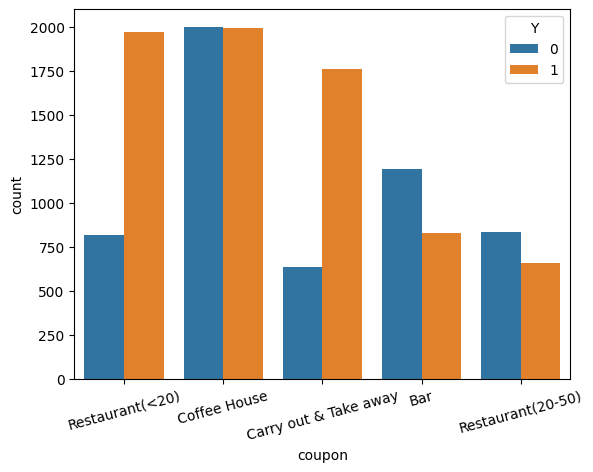

In [268]:
# Coupon column as a bar plot, sorted by acceptance of the coupon
# 
sns.countplot(x="coupon", data=data, hue="Y")
plt.xticks(rotation=15)


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

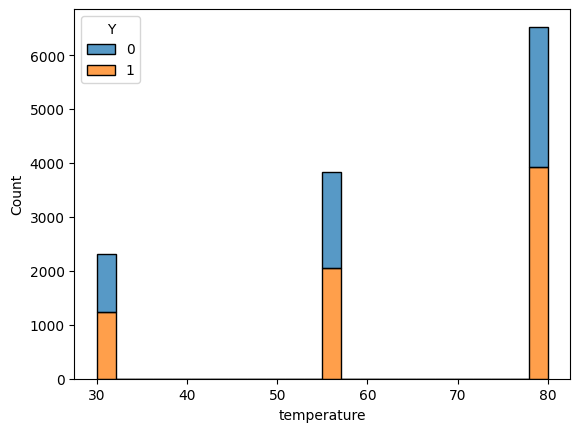

In [269]:
sns.histplot(data, x="temperature", hue="Y", multiple="stack")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [270]:
data_bar_coupons_only = bar_coupons_only_filter(data)
data_bar_coupons_only

,destination,passenger,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),80,10AM,Bar,1d,Female,21,Unmarried partner,1,...,never,NaN,4-8,1-3,1,1,0,0,1,0
13,Home,Alone,55,6PM,Bar,1d,Female,21,Unmarried partner,1,...,never,NaN,4-8,1-3,1,0,0,1,0,1
17,Work,Alone,55,7AM,Bar,1d,Female,21,Unmarried partner,1,...,never,NaN,4-8,1-3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),80,10AM,Bar,1d,Male,21,Single,0,...,less1,4-8,4-8,less1,1,0,0,0,1,1
35,Home,Alone,55,6PM,Bar,1d,Male,21,Single,0,...,less1,4-8,4-8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),80,10PM,Bar,1d,Male,26,Single,0,...,never,1-3,4-8,1-3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),55,10PM,Bar,2h,Male,26,Single,0,...,never,1-3,4-8,1-3,1,1,0,0,1,0
12667,No Urgent Place,Alone,55,10AM,Bar,1d,Male,26,Single,0,...,never,1-3,4-8,1-3,1,1,0,0,1,0
12670,No Urgent Place,Partner,55,6PM,Bar,2h,Male,26,Single,0,...,never,1-3,4-8,1-3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [271]:
bar_coupon_acceptance_rate = post_filter_proportion( bar_coupons_only_filter(data) )
bar_coupon_acceptance_rate


0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [272]:
test = bar_three_or_less_per_month_filter( bar_coupons_only_filter(data) )
test.head(100)

three_or_fewer_acceptance_rate = post_filter_proportion(test)
print(three_or_fewer_acceptance_rate)

more_than_three_acceptance_rate = 1 - three_or_fewer_acceptance_rate
print(more_than_three_acceptance_rate)



0.5274043433298863
0.4725956566701137


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [273]:
over_once_month_over_25 = over_age_25_filter( bar_over_once_month_filter( bar_coupons_only_filter(data) ) )
under_and_25 = age_25_and_under_filter( bar_over_once_month_filter( bar_coupons_only_filter(data) ) )

#Acceptance Rate
over_once_month_over25_acceptance_rate = post_filter_proportion(over_once_month_over_25)
over_once_month_25and_under_acceptance_rate = post_filter_proportion(under_and_25)

print(over_once_month_over25_acceptance_rate)
print(over_once_month_25and_under_acceptance_rate)



0.6952380952380952
0.6704545454545454


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [274]:
# print( data_bar_coupons_only["passenger"].value_counts() )
# print( data_bar_coupons_only["occupation"].value_counts() )
# print( data_bar_coupons_only["maritalStatus"].value_counts() )
# print( data_bar_coupons_only["RestaurantLessThan20"].value_counts() )
print( data_bar_coupons_only["income"].value_counts() )


income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64


In [248]:
no_kids = no_kid_passengers_filter( bar_over_once_month_filter(data) )
no_FFF_either = no_farmingFishingForestry_filter(no_kids)

no_kids_no_FFF_acceptance_rate = post_filter_proportion(no_FFF_either)
print(no_kids_no_FFF_acceptance_rate)


0.6231060606060606


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [277]:
answer1 = post_filter_proportion( no_widows_filter( no_kid_passengers_filter( bar_over_once_month_filter( bar_coupons_only_filter(data) ) ) ) )
print(answer1)

answer2 = post_filter_proportion( under_age_30_filter( bar_over_once_month_filter(bar_coupons_only_filter(data) ) ) )
print(answer2)

answer3 = post_filter_proportion( income_under_50k_filter( cheap_rest_over_4_times_filter( bar_coupons_only_filter(data) ) ) )
print(answer3)



0.7132486388384754
0.7217391304347827
0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Investigating Coffee House Coupons

In [280]:
def coffeehouse_coupons_only_filter(data):
    return data[data["coupon"]=="Coffee House"]

In [281]:
data_coffeehouse_coupons_only = coffeehouse_coupons_only_filter(data)
data_coffeehouse_coupons_only



,destination,passenger,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4-8,1-3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4-8,1-3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4-8,1-3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),55,6PM,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4-8,1-3,1,1,0,0,1,1
15,Home,Alone,80,6PM,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4-8,1-3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,30,10PM,Coffee House,2h,Male,31,Married partner,1,...,never,4-8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,30,7AM,Coffee House,1d,Male,31,Married partner,1,...,never,4-8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,55,10PM,Coffee House,2h,Male,26,Single,0,...,never,1-3,4-8,1-3,1,0,0,1,0,0
12675,Home,Alone,30,10PM,Coffee House,2h,Male,26,Single,0,...,never,1-3,4-8,1-3,1,1,0,0,1,0


In [286]:
print( data_coffeehouse_coupons_only["CoffeeHouse"].value_counts() )


CoffeeHouse
less1    1075
1-3      1042
never     927
4-8       538
gt8       342
Name: count, dtype: int64


In [288]:
def coffee_house_three_or_less_per_month_filter(data):
    return data.loc[ (data['CoffeeHouse']=='1-3') | (data['CoffeeHouse']=='less1') | (data['CoffeeHouse']=='1-3') ]

def coffee_house_over_once_month_filter(data):
    return data.loc[ (data['CoffeeHouse']=='1-3') | (data['CoffeeHouse']=='4-8') | (data['CoffeeHouse']=='gt8') ]



2. What proportion of coffee house coupons were accepted?

In [284]:
post_filter_proportion(data_coffeehouse_coupons_only)

0.49924924924924924

3. Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more.


In [289]:
test2 = coffee_house_three_or_less_per_month_filter( coffeehouse_coupons_only_filter(data) )
test2.head(100)

three_or_fewer_acceptance_rate = post_filter_proportion(test2)
print(three_or_fewer_acceptance_rate)

more_than_three_acceptance_rate = 1 - three_or_fewer_acceptance_rate
print(more_than_three_acceptance_rate)

0.5635333018422296
0.4364666981577704


4. Compare the acceptance rate between drivers who go to a Coffee House more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [290]:
over_once_month_over_25 = over_age_25_filter( coffee_house_over_once_month_filter( coffeehouse_coupons_only_filter(data) ) )
under_and_25 = age_25_and_under_filter( coffee_house_over_once_month_filter( coffeehouse_coupons_only_filter(data) ) )

#Acceptance Rate
over_once_month_over25_acceptance_rate = post_filter_proportion(over_once_month_over_25)
over_once_month_25and_under_acceptance_rate = post_filter_proportion(under_and_25)

print(over_once_month_over25_acceptance_rate)
print(over_once_month_25and_under_acceptance_rate)

0.6384388807069219
0.7127659574468085


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [291]:
no_kids = no_kid_passengers_filter( coffee_house_over_once_month_filter(data) )
no_FFF_either = no_farmingFishingForestry_filter(no_kids)

no_kids_no_FFF_acceptance_rate = post_filter_proportion(no_FFF_either)
print(no_kids_no_FFF_acceptance_rate)

0.6420150053590568


6. Compare the acceptance rates between those drivers who:

- go to Coffee Houses more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to Coffee Houses more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [292]:
answer1 = post_filter_proportion( no_widows_filter( no_kid_passengers_filter( coffee_house_over_once_month_filter( coffeehouse_coupons_only_filter(data) ) ) ) )
print(answer1)

answer2 = post_filter_proportion( under_age_30_filter( coffee_house_over_once_month_filter( coffeehouse_coupons_only_filter(data) ) ) )
print(answer2)

answer3 = post_filter_proportion( income_under_50k_filter( cheap_rest_over_4_times_filter( coffeehouse_coupons_only_filter(data) ) ) )
print(answer3)

0.6607832322118037
0.6893401015228426
0.5429740791268759
